In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('ny_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_350_lag', 'new_cases_1 lag', 'new_cases_150_lag', 'new_cases_2_lag', 'new_cases_30_lag', 'minimum_temperature_celsius', 'new_cases_10_std', 'new_hospitalized_patients', 'new_cases_10_max', 'new_cases_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_cases_3_lag', 'new_cases_50_std']]
covid_test = covid_test[['y', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_350_lag', 'new_cases_1 lag', 'new_cases_150_lag', 'new_cases_2_lag', 'new_cases_30_lag', 'minimum_temperature_celsius', 'new_cases_10_std', 'new_hospitalized_patients', 'new_cases_10_max', 'new_cases_7_lag', 'new_cases_10_min', 'relative_humidity', 'new_cases_3_lag', 'new_cases_50_std']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:4431.76390	validation_1-rmse:11956.99160
[1]	validation_0-rmse:4392.24378	validation_1-rmse:11853.12500
[2]	validation_0-rmse:4353.08129	validation_1-rmse:11751.21591
[3]	validation_0-rmse:4314.29617	validation_1-rmse:11650.24490
[4]	validation_0-rmse:4275.90535	validation_1-rmse:11549.69651
[5]	validation_0-rmse:4237.86275	validation_1-rmse:11450.76143
[6]	validation_0-rmse:4200.19756	validation_1-rmse:11352.37155
[7]	validation_0-rmse:4162.89756	validation_1-rmse:11254.99626
[8]	validation_0-rmse:4125.95332	validation_1-rmse:11158.62821
[9]	validation_0-rmse:4089.34559	validation_1-rmse:11063.60912
[10]	validation_0-rmse:4053.15290	validation_1-rmse:10970.01835
[11]	validation_0-rmse:4017.26003	validation_1-rmse:10876.48778
[12]	validation_0-rmse:3981.71531	validation_1-rmse:10783.94759
[13]	validation_0-rmse:3946.54333	validation_1-rmse:10693.16416
[14]	validation_0-rmse:3911.64764	validation_1-rmse:10603.47459
[15]	validation_0-rmse:3877.11868	validation_1-rms

[130]	validation_0-rmse:1465.55950	validation_1-rmse:5370.83359
[131]	validation_0-rmse:1453.58725	validation_1-rmse:5356.99309
[132]	validation_0-rmse:1442.07775	validation_1-rmse:5345.35443
[133]	validation_0-rmse:1430.62857	validation_1-rmse:5335.24162
[134]	validation_0-rmse:1418.93656	validation_1-rmse:5322.43462
[135]	validation_0-rmse:1407.65229	validation_1-rmse:5310.70385
[136]	validation_0-rmse:1396.53948	validation_1-rmse:5300.56815
[137]	validation_0-rmse:1385.44566	validation_1-rmse:5289.44362
[138]	validation_0-rmse:1374.28677	validation_1-rmse:5287.88042
[139]	validation_0-rmse:1363.23594	validation_1-rmse:5286.40005
[140]	validation_0-rmse:1352.29191	validation_1-rmse:5284.99919
[141]	validation_0-rmse:1341.45201	validation_1-rmse:5283.65945
[142]	validation_0-rmse:1330.70658	validation_1-rmse:5282.28560
[143]	validation_0-rmse:1320.06227	validation_1-rmse:5281.00940
[144]	validation_0-rmse:1309.46608	validation_1-rmse:5279.93982
[145]	validation_0-rmse:1299.02036	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

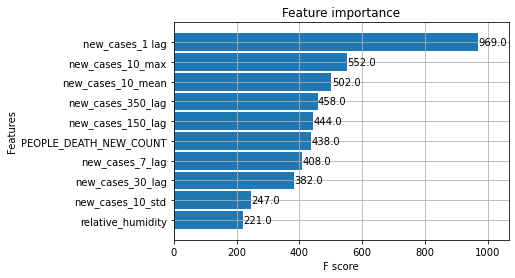

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

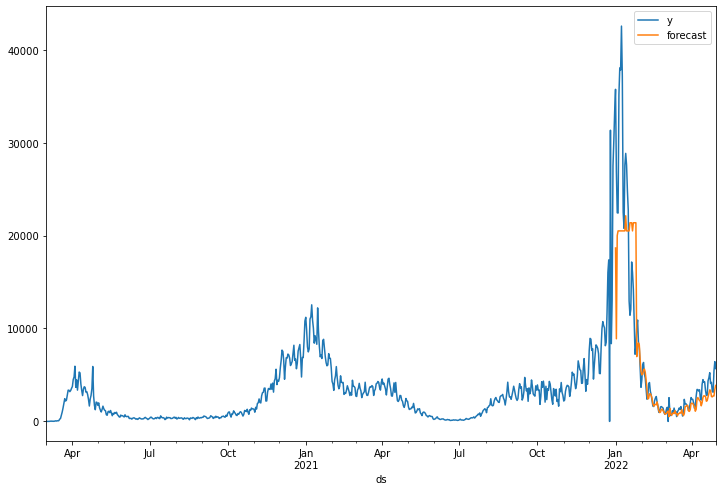

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

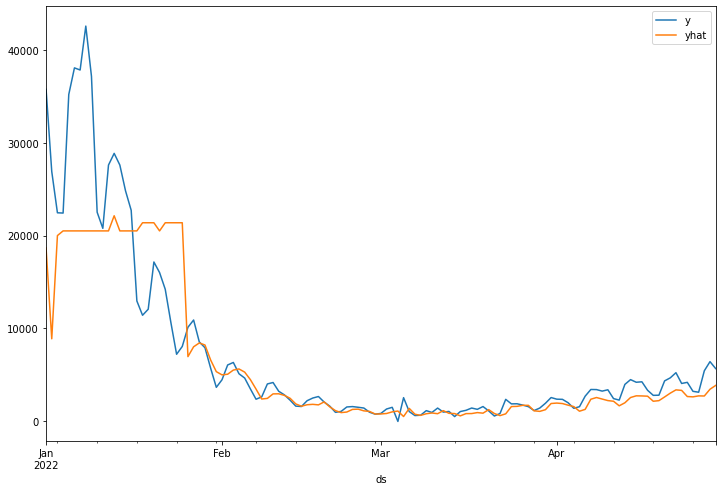

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  5270.33434713285
Test MAE:  2577.795086516052
MASE =  1.9476483256853983


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

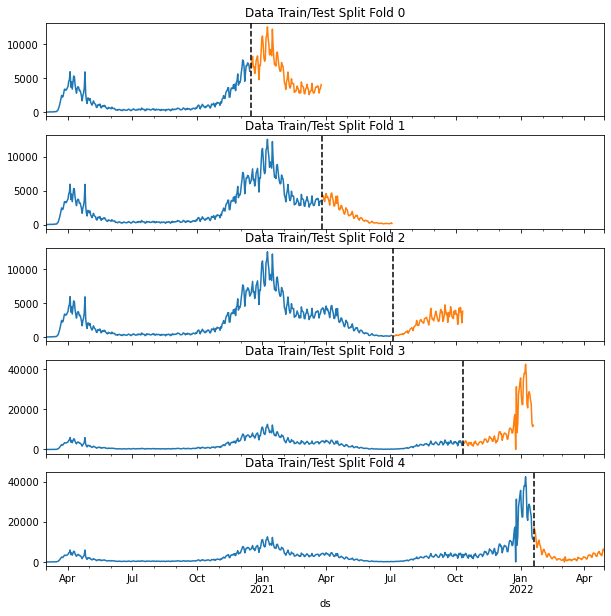

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[22:53:13] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4432.19735	validation_1-rmse:11956.88618
[100]	validation_0-rmse:1915.95507	validation_1-rmse:5928.44146
[200]	validation_0-rmse:948.67836	validation_1-rmse:5057.88474
[205]	validation_0-rmse:921.52349	validation_1-rmse:5063.21715
[22:53:14] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4432.19735	validation_1-rmse:11956.88618
[100]	validation_0-rmse:1915.95507	validation_1-rmse:5928.44146
[200]	validation_0-rmse:948.67836	validation_1-rmse:5057.88474
[205]	validation_0-rmse:921.52349	validation_1-rmse:5063.21715
[22:53:14] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated

<AxesSubplot:xlabel='ds'>

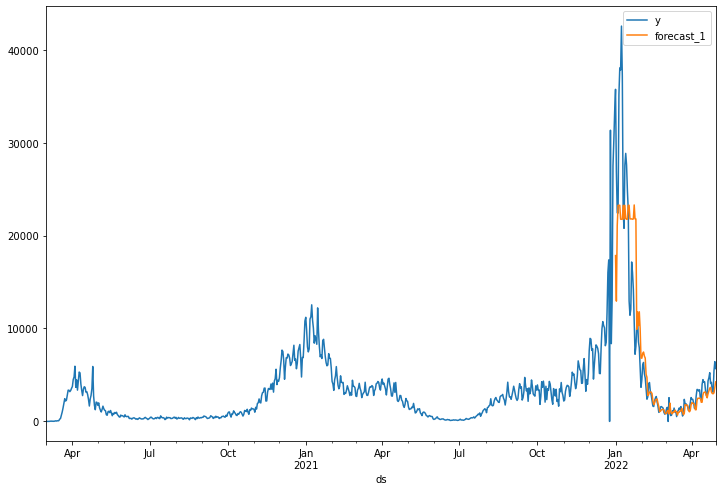

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

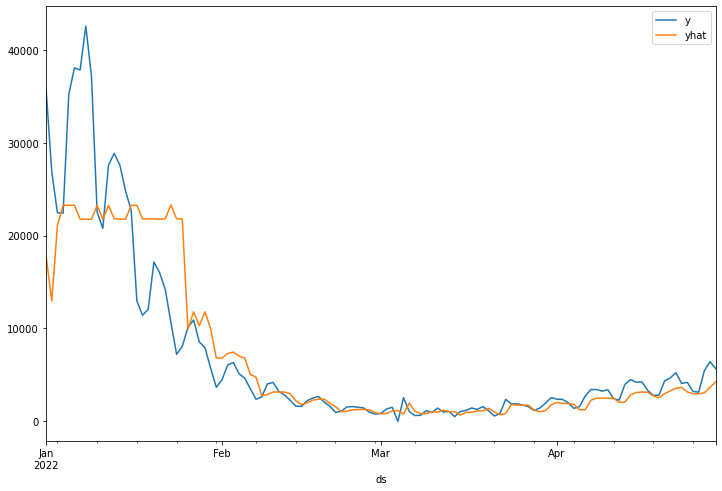

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  5270.33434713285
Test MAE:  2577.795086516052
MASE =  1.9476483256853983
